# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

In [5]:
cities_df = pd.DataFrame(cities)
cities_df

,0
0,chokurdakh
1,reconquista
2,new norfolk
3,honiara
4,rikitea
...,...
593,naruja
594,swan hill
595,port moresby
596,cabinda


In [6]:
cities_df['City ID'] = ""
cities_df['Latitude'] = ""
cities_df['Longitude'] = ""
cities_df['Temperature (F)'] = ""
cities_df['Humidity %'] = ""
cities_df['Cloudiness %'] = ""
cities_df['Wind Speed (mph)'] = ""
cities_df['City Country'] = ""
cities_df['City Time'] = ""

In [7]:
response = requests.get(query_url+"castro").json()
response


{'coord': {'lon': -50.01, 'lat': -24.79},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 59.61,
  'feels_like': 59.79,
  'temp_min': 59.61,
  'temp_max': 59.61,
  'pressure': 1012,
  'humidity': 96,
  'sea_level': 1012,
  'grnd_level': 901},
 'visibility': 10000,
 'wind': {'speed': 4.52, 'deg': 319},
 'clouds': {'all': 100},
 'dt': 1597643326,
 'sys': {'country': 'BR', 'sunrise': 1597657519, 'sunset': 1597698180},
 'timezone': -10800,
 'id': 3466704,
 'name': 'Castro',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
city = cities_df[0]
city

0        chokurdakh
1       reconquista
2       new norfolk
3           honiara
4           rikitea
           ...     
593          naruja
594       swan hill
595    port moresby
596         cabinda
597       tilichiki
Name: 0, Length: 598, dtype: object

In [9]:
for index, row in cities_df.iterrows():
    city = cities_df.loc[index, 0]
    
    response = requests.get(query_url + city).json()
  
        
    try:        
        cities_df.loc[index, 'City ID'] = response['id']
        cities_df.loc[index, 'Latitude'] = response['coord']['lat']
        cities_df.loc[index, 'Longitude'] = response['coord']['lon']
        cities_df.loc[index, 'Temperature (F)'] = response['main']['temp']
        cities_df.loc[index, 'Humidity %'] = response['main']['humidity']
        cities_df.loc[index, 'Cloudiness %'] = response['clouds']['all']
        cities_df.loc[index, 'Wind Speed (mph)'] = response['wind']['speed']
        cities_df.loc[index, 'City Country'] = response['sys']['country']
        cities_df.loc[index, 'City Time'] = response['dt']
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
  
        

Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
cities_df = cities_df.rename(columns={0:"City"})
cities_df = cities_df.dropna()
cities_df

,City,City ID,Latitude,Longitude,Temperature (F),Humidity %,Cloudiness %,Wind Speed (mph),City Country,City Time
0,chokurdakh,2126123,70.63,147.92,42.49,83,100,11.07,RU,1597643372
1,reconquista,3429594,-29.15,-59.65,46.87,60,0,4.76,AR,1597643607
2,new norfolk,2155415,-42.78,147.06,55.44,82,79,1.23,AU,1597643334
3,honiara,2108502,-9.43,159.95,86,74,40,6.93,SB,1597643466
4,rikitea,4030556,-23.12,-134.97,70.59,77,2,12.35,PF,1597643328
...,...,...,...,...,...,...,...,...,...,...
593,naruja,824385,41.91,41.95,74.35,64,20,6.93,GE,1597643735
594,swan hill,2147756,-35.34,143.55,60.44,56,28,9.51,AU,1597643735
595,port moresby,2088122,-9.44,147.18,84.2,62,5,23.04,PG,1597643735
596,cabinda,2243271,-5.55,12.2,75.2,88,75,7.43,AO,1597643736


In [13]:
cities_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
cities_df["Humidity %"] = pd.to_numeric(cities_df["Humidity %"], errors='coerce')

In [15]:
high_humid = cities_df.loc[cities_df["Humidity %"] > 100]

high_humid

,City,City ID,Latitude,Longitude,Temperature (F),Humidity %,Cloudiness %,Wind Speed (mph),City Country,City Time


In [16]:
#  Get the indices of cities that have humidity over 100%.


In [17]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [18]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

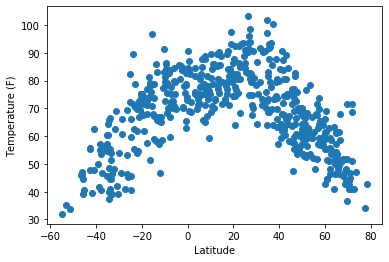

In [19]:

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
 

plt.scatter(pd.to_numeric(cities_df["Latitude"]),pd.to_numeric(cities_df["Temperature (F)"]))


In [20]:
#This plot shows that cities closer to the Equator (or at a Latitiude of 0) have a higher temperature.

## Latitude vs. Humidity Plot

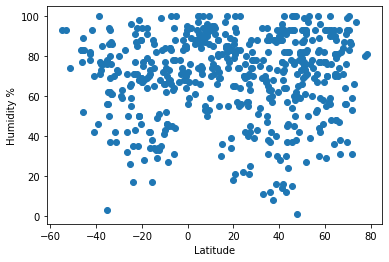

In [21]:
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.scatter(pd.to_numeric(cities_df["Latitude"]),pd.to_numeric(cities_df["Humidity %"]))

## Latitude vs. Cloudiness Plot

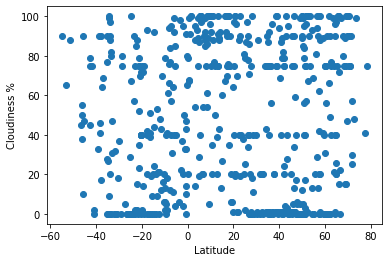

In [22]:
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.scatter(pd.to_numeric(cities_df["Latitude"]),pd.to_numeric(cities_df["Cloudiness %"]))

## Latitude vs. Wind Speed Plot

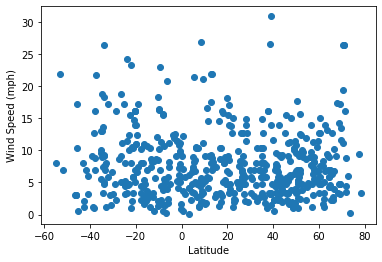

In [23]:
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.scatter(pd.to_numeric(cities_df["Latitude"]),pd.to_numeric(cities_df["Wind Speed (mph)"]))

## Linear Regression

In [24]:
# OPTIONAL: Create a function to create Linear Regression plots

In [25]:
# Create Northern and Southern Hemisphere DataFrames

northern_df = cities_df[pd.to_numeric(cities_df["Latitude"])>0]
northern_df

,City,City ID,Latitude,Longitude,Temperature (F),Humidity %,Cloudiness %,Wind Speed (mph),City Country,City Time
0,chokurdakh,2126123,70.63,147.92,42.49,83.0,100,11.07,RU,1597643372
6,fortuna,5563839,40.6,-124.16,59.31,91.0,87,2.33,US,1597643349
8,great yarmouth,2647984,52.61,1.73,63.01,97.0,67,3.87,GB,1597643346
9,butaritari,2110227,3.07,172.79,81.81,61.0,14,0.11,KI,1597643354
10,flin flon,5954718,54.77,-101.86,52.11,74.0,69,4.32,CA,1597643609
...,...,...,...,...,...,...,...,...,...,...
589,panama city,3703443,8.99,-79.52,78.03,94.0,100,4.7,PA,1597643657
590,abonnema,2324433,4.71,6.79,73.4,100.0,75,4.83,NG,1597643734
592,requena,2511930,39.49,-1.1,57,62.0,0,4.83,ES,1597643735
593,naruja,824385,41.91,41.95,74.35,64.0,20,6.93,GE,1597643735


In [26]:
southern_df = cities_df[pd.to_numeric(cities_df["Latitude"])<0]
southern_df

,City,City ID,Latitude,Longitude,Temperature (F),Humidity %,Cloudiness %,Wind Speed (mph),City Country,City Time
1,reconquista,3429594,-29.15,-59.65,46.87,60.0,0,4.76,AR,1597643607
2,new norfolk,2155415,-42.78,147.06,55.44,82.0,79,1.23,AU,1597643334
3,honiara,2108502,-9.43,159.95,86,74.0,40,6.93,SB,1597643466
4,rikitea,4030556,-23.12,-134.97,70.59,77.0,2,12.35,PF,1597643328
7,bengkulu,1649150,-3.8,102.27,85.73,67.0,6,12.37,ID,1597643129
...,...,...,...,...,...,...,...,...,...,...
588,kiunga,2093846,-6.12,141.29,84.67,64.0,92,1.72,PG,1597643734
591,hualmay,3939761,-11.1,-77.61,58.57,83.0,70,8.72,PE,1597643583
594,swan hill,2147756,-35.34,143.55,60.44,56.0,28,9.51,AU,1597643735
595,port moresby,2088122,-9.44,147.18,84.2,62.0,5,23.04,PG,1597643735


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

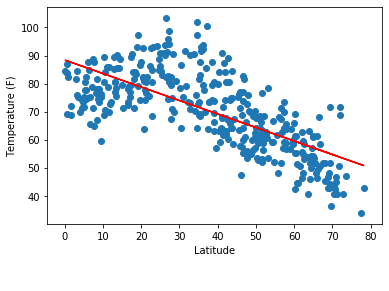

In [32]:
x_values = northern_df['Latitude']
y_values = northern_df['Temperature (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.scatter(x_values,y_values)
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

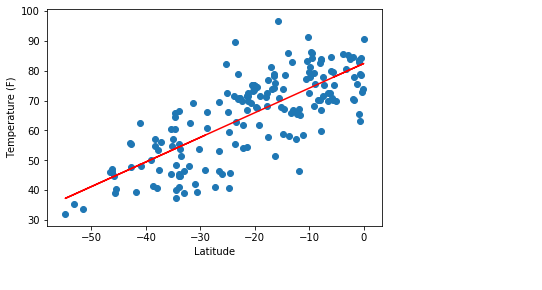

In [33]:
x_values = southern_df['Latitude']
y_values = southern_df['Temperature (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.scatter(x_values,y_values)
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

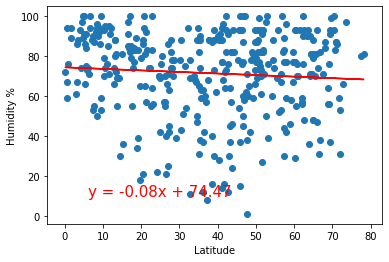

In [34]:
x_values = northern_df['Latitude']
y_values = northern_df['Humidity %']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.scatter(x_values,y_values)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

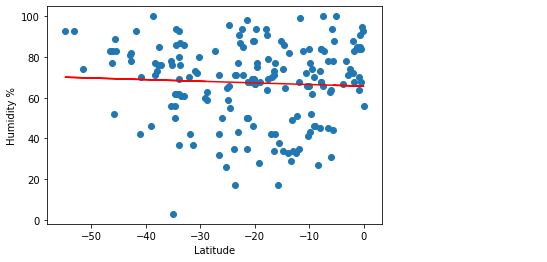

In [37]:
x_values = southern_df['Latitude']
y_values = southern_df['Humidity %']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.scatter(x_values,y_values)
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

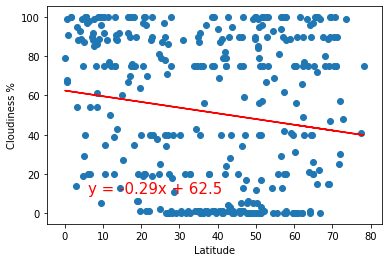

In [38]:
x_values = northern_df['Latitude']
y_values = northern_df['Cloudiness %']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.scatter(x_values,y_values)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

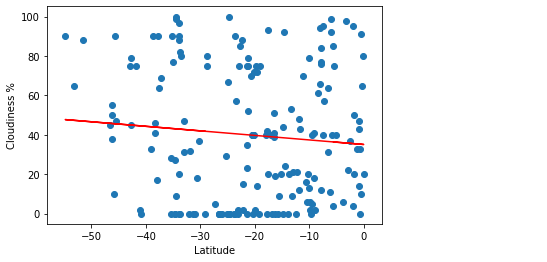

In [39]:
x_values = southern_df['Latitude']
y_values = southern_df['Cloudiness %']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.scatter(x_values,y_values)
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

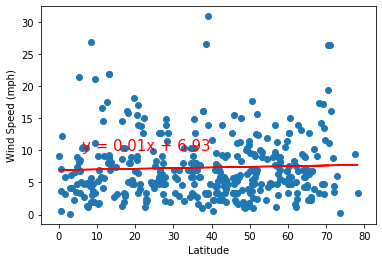

In [40]:
x_values = northern_df['Latitude']
y_values = northern_df['Wind Speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.scatter(x_values,y_values)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

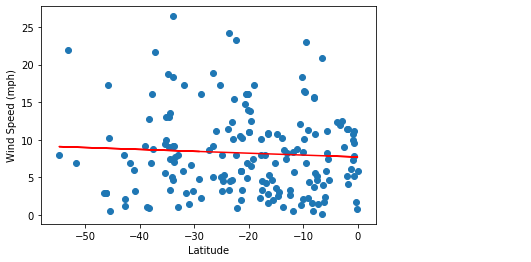

In [41]:
x_values = southern_df['Latitude']
y_values = southern_df['Wind Speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.scatter(x_values,y_values)
plt.show()